In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

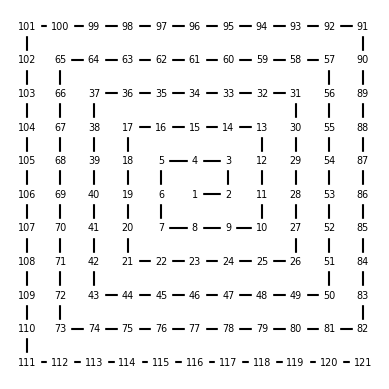

In [2]:
dir = {
    0: [1,0],
    1: [0,1],
    2: [-1,0],
    3: [0,-1]
}

def cornerFinder(n: int) -> list:
    corners = []
    num = 0
    count = 0
    while num < n:
        count += 1
        num = np.floor(np.divide(np.power(count, 2), 4)) + 1
        corners.append(num)
    return corners

def numSpiral(n: int, seq: list) -> None:
    turns = cornerFinder(n)
    pointer = 3
    pos = [0,0]
    oldpos = [0,0]
    turnCount = 0
    
    for i in range(1,n+1):
        
        x = [oldpos[0], pos[0]]
        y = [oldpos[1], pos[1]]
        plt.plot(x, y, color="black")

        col = "green" if (i in seq)  else "white"
        plt.text(pos[0],pos[1],i,ha="center",va="center",backgroundcolor=col,fontsize="x-small")
        
        if i == turns[turnCount]:
            pointer = (pointer+1) % 4
            turnCount += 1    
        oldpos = pos
        pos = np.add(pos, dir[pointer])

    plt.axis("off")
    plt.gca().set_aspect("equal")
    plt.show()
        
numSpiral(121,[])

In [3]:
num = 40000

sequenceA = []
temp = 0
count = 0
while temp < num:
    count += 1
    temp = np.power(count,2)
    sequenceA.append(temp)

sequenceB = [n for n in range(num+1) if (n % 3) == 0]

sequenceC = [n for n in range(2,num+1) if all(
    (n % m) != 0 for m in range(2, int( np.sqrt(n) )+1) )]

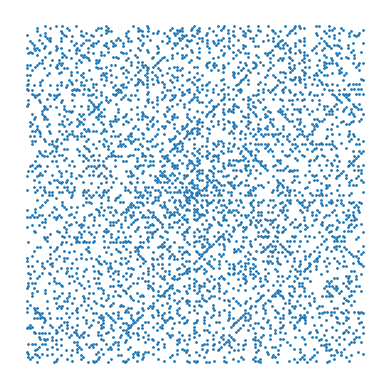

In [4]:
def dotSpiral(n: int, seq: list) -> None:
    turns = cornerFinder(n)
    pointer = 3
    pos = [0,0]
    turnCount = 0
    x = []
    y = []
    
    for i in range(1,n+1):

        if i in seq:
            x.append(pos[0])
            y.append(pos[1])
        
        if i == turns[turnCount]:
            pointer = (pointer+1) % 4
            turnCount += 1    
        pos = np.add(pos, dir[pointer])
        
    plt.scatter(x,y,s=1)
    plt.gca().set_aspect("equal")
    plt.axis("off")
    plt.show()
        
dotSpiral(num,sequenceC)

In [6]:
def posFinder(n: int) -> list:
    k = np.floor(np.sqrt((4*n) -3 ))
    c = np.floor(np.divide(np.power(k,2),4)) + 1
    t1 = k // 4
    t2 = k % 4

    if t2 == 0:
        x = int( -(t1) )
        y = int( (t1) + (c-n))
    elif t2 == 1:
        x = int( -(t1) + (n-c) )
        y = int( -(t1) )
    elif t2 == 2:
        x = int( (t1+1) )
        y = int( -(t1+1) + (n-c+1))
    else:
        x = int( (t1+1) + (c-n) )
        y = int( (t1+1) )
        
    pos = [x, y]
    return pos

print(posFinder(100))

[-4, 5]


In [7]:
def valFinder(pos: list) -> int:
    x, y = pos

    if x <= y and y < -x:
        val = (4*(np.power(x,2))) -(x) + (1 - y)
    elif -x < y and y <= x:
        val = (4*(np.power(x,2))) -(3*x) + (1 + y)
    elif y < x and x <= -y:
        val = (4*(np.power(y,2))) -(3*y) + (1 + x)
    else:
        val = (4*(np.power(y,2))) -(y) + (1 - x)
    
    return val

print(valFinder([1,-5]))

117
